In [1]:
# SVM searches for maximum margin equidistance line as a separator of classes
# maximum margin hyperplane as the seperator
# only suport vectors count on the hyperplane positioning
# means it doesnt look at the most standart sample it looks to the nearest from the other class element
# svm looks at the closest to boundary case

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Importing the dataset
# must make UTS/Laptop varibales
ws_sub = r"Support Vector Machine (SVM)"
ws = r"Data"
data_file = "Social_Network_Ads.csv"
data_file_path = os.path.join(os.path.join(os.path.join(ws, ws_sub), "data"),data_file)
dataset = pd.read_csv(data_file_path)
# dataset

In [5]:
# splitting the dataset
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
# y

In [6]:
# splitting the dataset into the Training Set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 1/4, random_state = 42)
## must check what random_state does
# X_train
# X_test
# Y_train
# Y_train

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.fit_transform(X_test)
# X test and train scaled with the same scale matrix

c:\users\c.r.c\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# Fitting SVM to the training set
from sklearn.svm import SVC
# help(SVC)
classifier = SVC(kernel = 'linear', random_state = 0) # random_state = 0 # just to get same results
# must check other kernel (rbf = gaussian)
classifier.fit(x_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
# predicting the test set results
y_pred = classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df["test_vals"] = Y_test
df.rename(columns={0: "pred_vals"}, inplace = True)
df

,pred_vals,test_vals
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
# help(confusion_matrix)
cm = confusion_matrix(Y_test, y_pred)
'''
cm
array([[61,  2],
       [12, 25]], dtype=int64)
'''

'\ncm\narray([[61,  2],\n       [12, 25]], dtype=int64)\n'

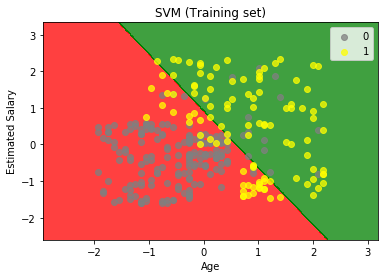

In [15]:
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

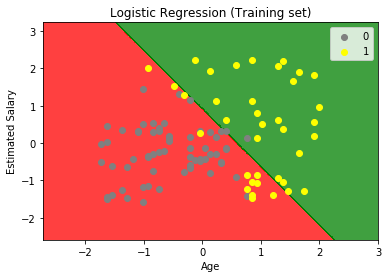

In [16]:
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, Y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [17]:

help(SVC)

# must test kernels


Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

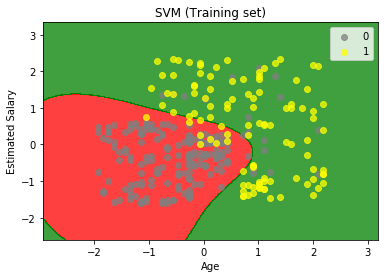

In [22]:
# Fitting SVM to the training set
from sklearn.svm import SVC
# help(SVC)
classifier_gaussian = SVC(kernel = 'rbf', random_state = 0) # random_state = 0 # just to get same results
# must check other kernel (rbf = gaussian)
classifier_gaussian.fit(x_train, Y_train)
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier_gaussian.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

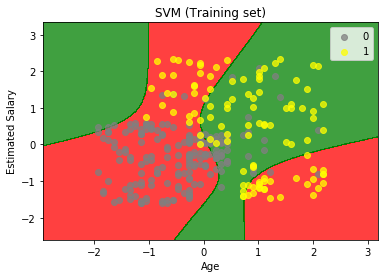

In [20]:
# Fitting SVM to the training set
from sklearn.svm import SVC
# help(SVC)
classifier_sigmoid = SVC(kernel = 'sigmoid', random_state = 0) # random_state = 0 # just to get same results
# must check other kernel (rbf = gaussian)
classifier_sigmoid.fit(x_train, Y_train)
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier_sigmoid.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

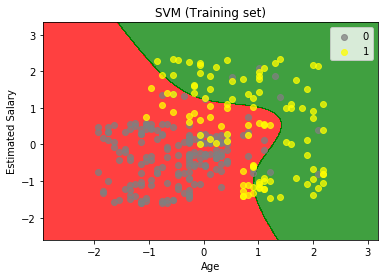

In [21]:
# Fitting SVM to the training set
from sklearn.svm import SVC
# help(SVC)
classifier_poly = SVC(kernel = 'poly', random_state = 0) # random_state = 0 # just to get same results
# must check other kernel (rbf = gaussian)
classifier_poly.fit(x_train, Y_train)
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier_poly.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

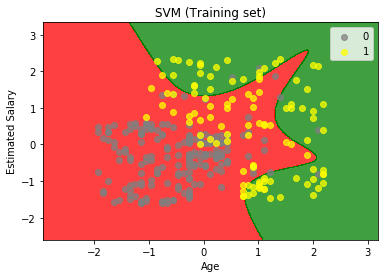

In [28]:

# Fitting SVM to the training set
from sklearn.svm import SVC
# help(SVC)
classifier_poly = SVC(kernel = 'poly',degree = 5, random_state = 0) # random_state = 0 # just to get same results
# must check other kernel (rbf = gaussian)
classifier_poly.fit(x_train, Y_train)
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier_poly.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()